In [542]:
import numpy as np
responed = [17, 15, 71, 322, 401, 511]
m = 1 # slope
s = responed[5]/sum(responed)
r = responed[0]/sum(responed)
c = (2- ((s-r)**2) * m)/2*(s-r) # bias

In [543]:
per_responed = [x/sum(responed) for x in responed]
x = np.asarray(per_responed)
y = [0,1,2,3,4,5]
x, y

(array([0.01271503, 0.01121915, 0.05310396, 0.2408377 , 0.29992521,
        0.38219895]), [0, 1, 2, 3, 4, 5])

In [544]:
X = np.vstack([x, np.ones(len(x))]).T
X

array([[0.01271503, 1.        ],
       [0.01121915, 1.        ],
       [0.05310396, 1.        ],
       [0.2408377 , 1.        ],
       [0.29992521, 1.        ],
       [0.38219895, 1.        ]])

In [545]:
from bayespy.nodes import GaussianARD
B = GaussianARD(0, 1e-6, shape=(2,))
B

In [546]:
from bayespy.nodes import SumMultiply
F = SumMultiply('i,i', B, X)
F

In [547]:
from bayespy.nodes import Gamma
tau = Gamma(1e-3, 1e-3)
tau

In [548]:
Y = GaussianARD(F, tau)
Y

In [549]:
Y.observe(y)

In [550]:
from bayespy.inference import VB
Q = VB(Y, B, tau)

In [551]:
Q.update(repeat=5000)

Iteration 1: loglike=-2.599588e+01 (0.002 seconds)
Iteration 2: loglike=-2.566996e+01 (0.002 seconds)
Iteration 3: loglike=-2.559766e+01 (0.002 seconds)
Iteration 4: loglike=-2.558661e+01 (0.002 seconds)
Iteration 5: loglike=-2.558522e+01 (0.002 seconds)
Iteration 6: loglike=-2.558506e+01 (0.003 seconds)
Converged at iteration 6.


In [552]:
xh = np.linspace(0,5, 100)
Xh = np.vstack([xh, np.ones(len(xh))]).T
Fh = SumMultiply('i,i', B, Xh)

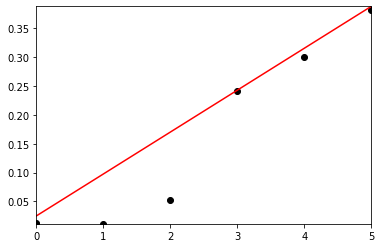

In [553]:
import bayespy.plot as bpplt
bpplt.pyplot.figure()
#bpplt.plot(Fh, x=xh, scale=2)
bpplt.plot(x, x=y, color='black', marker='o', linestyle='None')
bpplt.plot((m*xh+c)/(1377/100), x=xh, color='r');